In [1]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import netCDF4
import scipy
import mjoindices.olr_handling as olr
import mjoindices.omi.wheeler_kiladis_mjo_filter
f = xr.open_dataset(r'C:\Users\lv299\OneDrive\Melbourne-Uni\Week 4\Monday\correction.nc')
ds = f.__xarray_dataarray_variable__
nds = ds.loc[:,20:-20.1,:]

In [2]:
sgl= (1983, 1988, 1995, 1998, 2005, 2007, 2010, 2016)
sgl = np.array(sgl,dtype = 'int32')
sgl =sgl -1981
dbl=(1984, 1999, 2008, 2011, 2017)
dbl = np.array(dbl,dtype = 'int32')
dbl = dbl -1981

In [3]:
varnds = nds.rolling(time = 91, center = True).var().dropna("time")
a = varnds.values
b = np.sqrt(a)
lat = varnds['lat']
lon = varnds['lon']
time = varnds['time']

sqrtvar = xr.DataArray(b,
coords = {'time' : time, 'lat' : lat, 'lon' : lon},
dims = ["time", "lat", "lon"])

C:\Users\lv299\anaconda3\lib\site-packages\cartopy\crs.py:245: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
C:\Users\lv299\anaconda3\lib\site-packages\cartopy\crs.py:297: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
C:\Users\lv299\anaconda3\lib\site-packages\cartopy\crs.py:364: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:


C:\Users\lv299\anaconda3\lib\site-packages\cartopy\crs.py:256: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  line_strings = list(multi_line_string)
C:\Users\lv299\anaconda3\lib\site-packages\cartopy\crs.py:256: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  line_strings = list(multi_line_string)
C:\Users\lv299\anaconda3\lib\site-packages\cartopy\crs.py:402: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  line_strings.extend(multi_line_string)
C:\Users\lv299\anaconda3\lib\site-packages\cartopy\crs.py:402: ShapelyDeprecatio

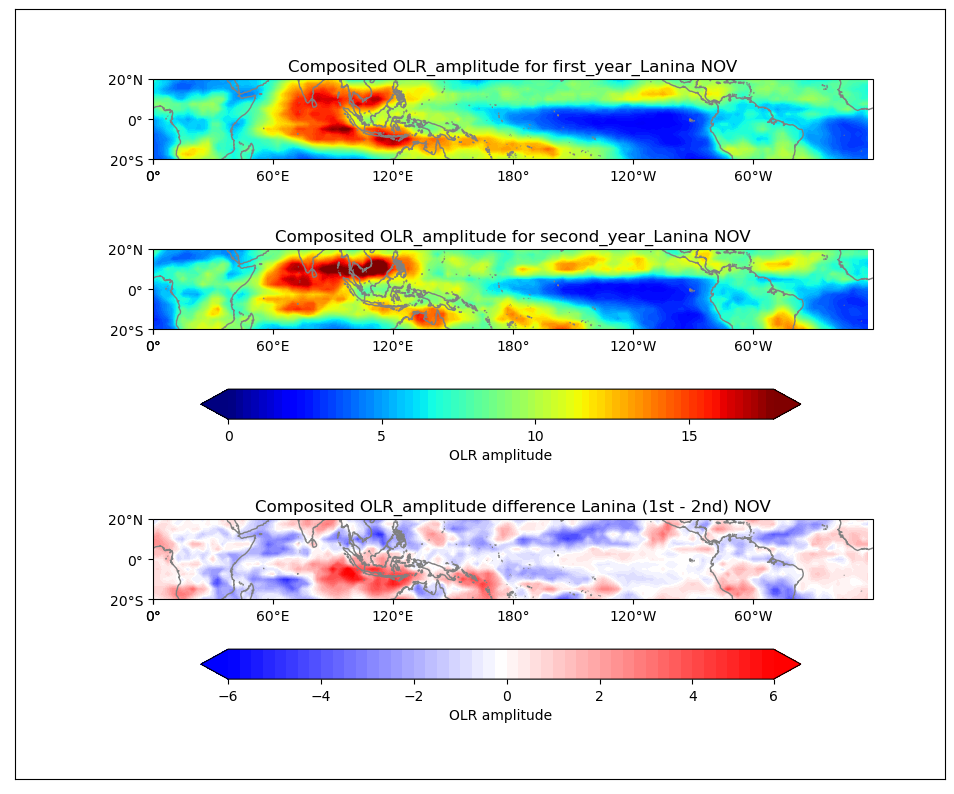

In [4]:
c = sqrtvar.resample(time ="M").mean(dim="time")

dsnov = c.groupby("time.month")[11]

dsnov['time']=dsnov['time.year']
dsnov=dsnov.rename({'time': 'Year'})
dsnov.name = 'olr'

oni = pd.read_csv('Year_NDJ.txt',delim_whitespace=True,index_col=0)
new_ds = xr.merge([dsnov,oni.to_xarray()],join='inner')

Lasgl = new_ds.olr[sgl,:,:].mean(axis=0)
Ladbl = new_ds.olr[dbl,:,:].mean(axis=0)

Delta = Ladbl - Lasgl

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature 
import cartopy.mpl.ticker as cticker 


leftlon, rightlon, lowerlat, upperlat = (0,420,-20,20)
img_extent = [leftlon, rightlon, lowerlat, upperlat]
lon_formatter = cticker.LongitudeFormatter()
lat_formatter = cticker.LatitudeFormatter()
#figur 1
fig,ax1 = plt.subplots(figsize=(12,10)) 
plt.xticks([])
plt.yticks([])
ax1 = fig.add_axes([0.24, 0.47, 0.6, 0.6],projection = ccrs.PlateCarree(central_longitude=180),zorder=1)
ax1.set_extent(img_extent, crs=ccrs.PlateCarree())
ax1.add_feature(cfeature.COASTLINE,color='grey') 
ax1.set_xticks(range(0,360+60,60), crs=ccrs.PlateCarree())
ax1.set_yticks(range(-20,21,20), crs=ccrs.PlateCarree())
ax1.xaxis.set_major_formatter(lon_formatter)
ax1.yaxis.set_major_formatter(lat_formatter)
ax1.title.set_text('Composited OLR_amplitude for first_year_Lanina NOV')
c1 = ax1.contourf(lon,lat,Lasgl,
                levels=np.arange(0,18,0.25),
                extend='both' ,
                cmap = 'jet',
                transform=ccrs.PlateCarree(),zorder = 0)
fig.colorbar(c1, cax=fig.add_axes([0.28, 0.47, 0.5, 0.03 ]),
             orientation='horizontal',  
             label= 'OLR amplitude', 
             ticks=np.arange(0,18.1,5),
             shrink=0.7)

# figure 2
ax = fig.add_axes([0.24, 0.3, 0.6, 0.6],projection = ccrs.PlateCarree(central_longitude=180),zorder=1)
ax.set_extent(img_extent, crs=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE,color='grey') 
ax.set_xticks(range(0,360+60,60), crs=ccrs.PlateCarree())
ax.set_yticks(range(-20,21,20), crs=ccrs.PlateCarree())
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.title.set_text('Composited OLR_amplitude for second_year_Lanina NOV')

c = ax.contourf(lon,lat,Ladbl,
                levels=np.arange(0,18,0.25),
                extend='both' ,
                cmap = 'jet',
                transform=ccrs.PlateCarree(),zorder = 0)


#figure 3
a = Lasgl-Ladbl 
    
ax0 = fig.add_axes([0.24, 0.03, 0.6, 0.6],projection = ccrs.PlateCarree(central_longitude=180),zorder=1)
ax0.set_extent(img_extent, crs=ccrs.PlateCarree())
ax0.add_feature(cfeature.COASTLINE,color='grey') 
ax0.set_xticks(range(0,360+60,60), crs=ccrs.PlateCarree())
ax0.set_yticks(range(-20,21,20), crs=ccrs.PlateCarree())
ax0.xaxis.set_major_formatter(lon_formatter)
ax0.yaxis.set_major_formatter(lat_formatter)
ax0.title.set_text('Composited OLR_amplitude difference Lanina (1st - 2nd) NOV')

c0 = ax0.contourf(lon,lat,a,
                levels=np.arange(-6,6,0.25),
                extend='both' ,
                cmap = plt.get_cmap('bwr'),
                transform=ccrs.PlateCarree(),zorder = 0)


fig.colorbar(c0, cax=fig.add_axes([0.28, 0.21, 0.5, 0.03 ]),
             orientation='horizontal',  
             label= 'OLR amplitude', 
             ticks=np.arange(-6,6.1,2),
             shrink=0.7)

C:\Users\lv299\anaconda3\lib\site-packages\cartopy\crs.py:245: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
C:\Users\lv299\anaconda3\lib\site-packages\cartopy\crs.py:297: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
C:\Users\lv299\anaconda3\lib\site-packages\cartopy\crs.py:364: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:


C:\Users\lv299\anaconda3\lib\site-packages\cartopy\crs.py:256: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  line_strings = list(multi_line_string)
C:\Users\lv299\anaconda3\lib\site-packages\cartopy\crs.py:256: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  line_strings = list(multi_line_string)
C:\Users\lv299\anaconda3\lib\site-packages\cartopy\crs.py:402: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  line_strings.extend(multi_line_string)
C:\Users\lv299\anaconda3\lib\site-packages\cartopy\crs.py:402: ShapelyDeprecatio

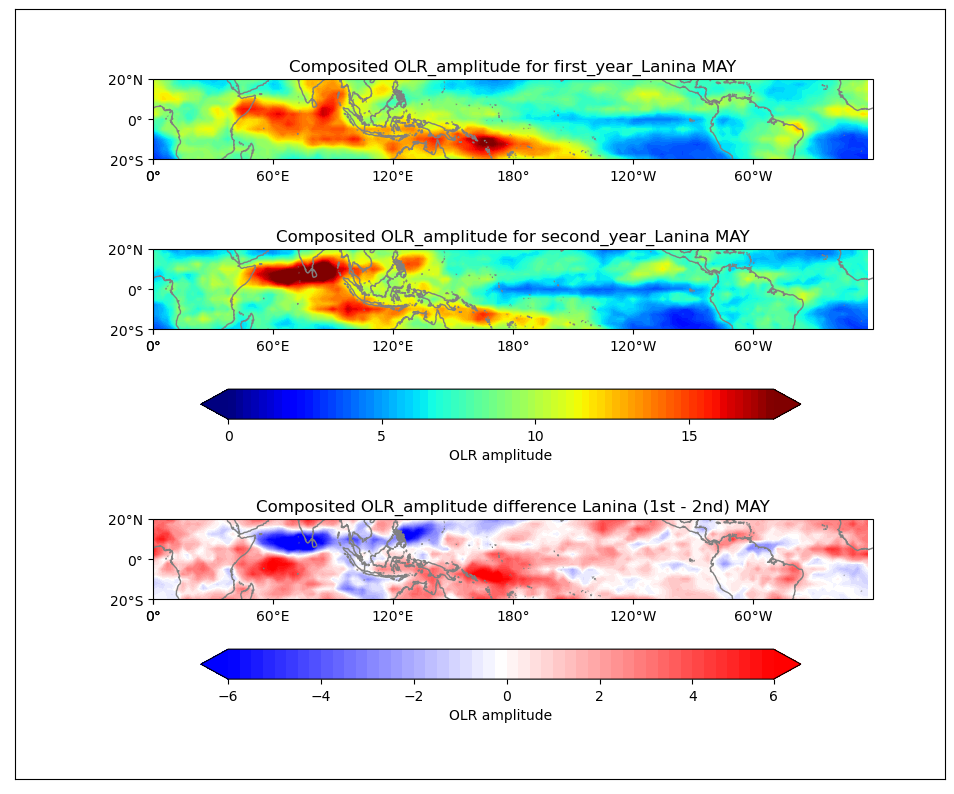

In [5]:
c = sqrtvar.resample(time ="M").mean(dim="time")

dsnov = c.groupby("time.month")[4]

dsnov['time']=dsnov['time.year']
dsnov=dsnov.rename({'time': 'Year'})
dsnov.name = 'olr'

oni = pd.read_csv('Year_NDJ.txt',delim_whitespace=True,index_col=0)
new_ds = xr.merge([dsnov,oni.to_xarray()],join='inner')
Lasgl = new_ds.olr[sgl,:,:].mean(axis=0)
Ladbl = new_ds.olr[dbl,:,:].mean(axis=0)
Delta = Ladbl - Lasgl
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature 
import cartopy.mpl.ticker as cticker 


leftlon, rightlon, lowerlat, upperlat = (0,420,-20,20)
img_extent = [leftlon, rightlon, lowerlat, upperlat]
lon_formatter = cticker.LongitudeFormatter()
lat_formatter = cticker.LatitudeFormatter()
#figur 1
fig,ax1 = plt.subplots(figsize=(12,10)) 
plt.xticks([])
plt.yticks([])
ax1 = fig.add_axes([0.24, 0.47, 0.6, 0.6],projection = ccrs.PlateCarree(central_longitude=180),zorder=1)
ax1.set_extent(img_extent, crs=ccrs.PlateCarree())
ax1.add_feature(cfeature.COASTLINE,color='grey') 
ax1.set_xticks(range(0,360+60,60), crs=ccrs.PlateCarree())
ax1.set_yticks(range(-20,21,20), crs=ccrs.PlateCarree())
ax1.xaxis.set_major_formatter(lon_formatter)
ax1.yaxis.set_major_formatter(lat_formatter)
ax1.title.set_text('Composited OLR_amplitude for first_year_Lanina MAY')
c1 = ax1.contourf(lon,lat,Lasgl,
                levels=np.arange(0,18,0.25),
                extend='both' ,
                cmap = 'jet',
                transform=ccrs.PlateCarree(),zorder = 0)
fig.colorbar(c1, cax=fig.add_axes([0.28, 0.47, 0.5, 0.03 ]),
             orientation='horizontal',  
             label= 'OLR amplitude', 
             ticks=np.arange(0,18.1,5),
             shrink=0.7)

# figure 2
ax = fig.add_axes([0.24, 0.3, 0.6, 0.6],projection = ccrs.PlateCarree(central_longitude=180),zorder=1)
ax.set_extent(img_extent, crs=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE,color='grey') 
ax.set_xticks(range(0,360+60,60), crs=ccrs.PlateCarree())
ax.set_yticks(range(-20,21,20), crs=ccrs.PlateCarree())
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.title.set_text('Composited OLR_amplitude for second_year_Lanina MAY')

c = ax.contourf(lon,lat,Ladbl,
                levels=np.arange(0,18,0.25),
                extend='both' ,
                cmap = 'jet',
                transform=ccrs.PlateCarree(),zorder = 0)


#figure 3
a = Lasgl-Ladbl 
    
ax0 = fig.add_axes([0.24, 0.03, 0.6, 0.6],projection = ccrs.PlateCarree(central_longitude=180),zorder=1)
ax0.set_extent(img_extent, crs=ccrs.PlateCarree())
ax0.add_feature(cfeature.COASTLINE,color='grey') 
ax0.set_xticks(range(0,360+60,60), crs=ccrs.PlateCarree())
ax0.set_yticks(range(-20,21,20), crs=ccrs.PlateCarree())
ax0.xaxis.set_major_formatter(lon_formatter)
ax0.yaxis.set_major_formatter(lat_formatter)
ax0.title.set_text('Composited OLR_amplitude difference Lanina (1st - 2nd) MAY')

c0 = ax0.contourf(lon,lat,a,
                levels=np.arange(-6,6,0.25),
                extend='both' ,
                cmap = plt.get_cmap('bwr'),
                transform=ccrs.PlateCarree(),zorder = 0)


fig.colorbar(c0, cax=fig.add_axes([0.28, 0.21, 0.5, 0.03 ]),
             orientation='horizontal',  
             label= 'OLR amplitude', 
             ticks=np.arange(-6,6.1,2),
             shrink=0.7)

C:\Users\lv299\anaconda3\lib\site-packages\cartopy\crs.py:245: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
C:\Users\lv299\anaconda3\lib\site-packages\cartopy\crs.py:297: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
C:\Users\lv299\anaconda3\lib\site-packages\cartopy\crs.py:364: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:


C:\Users\lv299\anaconda3\lib\site-packages\cartopy\crs.py:256: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  line_strings = list(multi_line_string)
C:\Users\lv299\anaconda3\lib\site-packages\cartopy\crs.py:256: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  line_strings = list(multi_line_string)
C:\Users\lv299\anaconda3\lib\site-packages\cartopy\crs.py:402: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  line_strings.extend(multi_line_string)
C:\Users\lv299\anaconda3\lib\site-packages\cartopy\crs.py:402: ShapelyDeprecatio

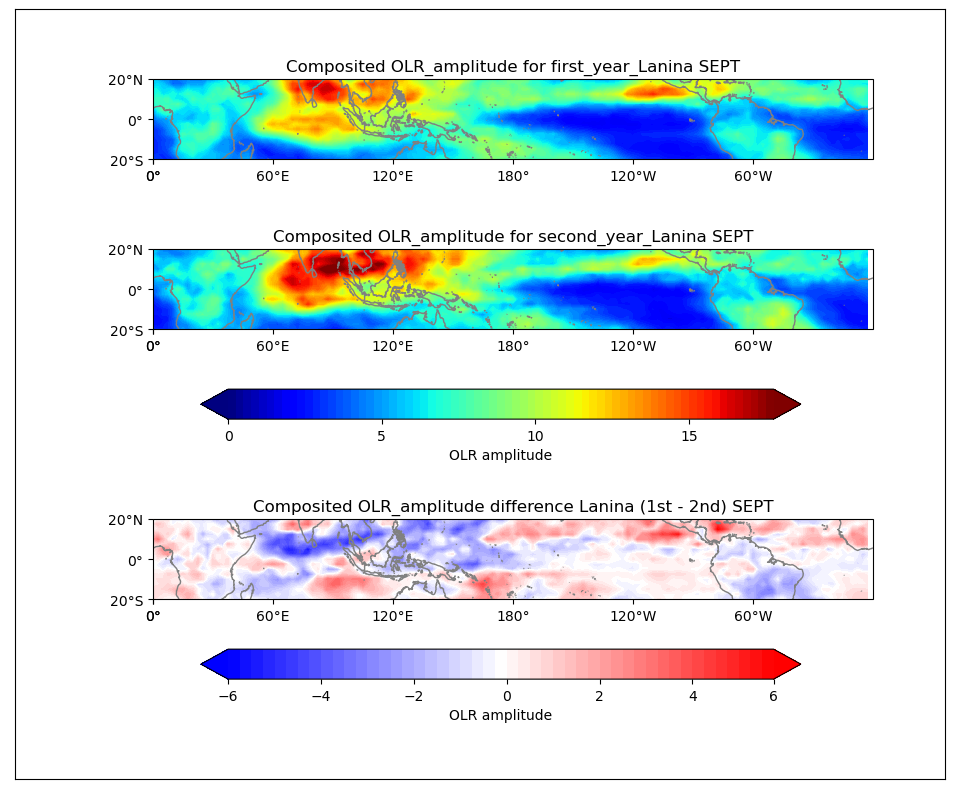

In [6]:
c = sqrtvar.resample(time ="M").mean(dim="time")

dsnov = c.groupby("time.month")[9]
dsnov['time']=dsnov['time.year']
dsnov=dsnov.rename({'time': 'Year'})
dsnov.name = 'olr'

oni = pd.read_csv('Year_NDJ.txt',delim_whitespace=True,index_col=0)
new_ds = xr.merge([dsnov,oni.to_xarray()],join='inner')
Lasgl = new_ds.olr[sgl,:,:].mean(axis=0)
Ladbl = new_ds.olr[dbl,:,:].mean(axis=0)
Delta = Ladbl - Lasgl
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature 
import cartopy.mpl.ticker as cticker 


leftlon, rightlon, lowerlat, upperlat = (0,420,-20,20)
img_extent = [leftlon, rightlon, lowerlat, upperlat]
lon_formatter = cticker.LongitudeFormatter()
lat_formatter = cticker.LatitudeFormatter()
#figur 1
fig,ax1 = plt.subplots(figsize=(12,10)) 
plt.xticks([])
plt.yticks([])
ax1 = fig.add_axes([0.24, 0.47, 0.6, 0.6],projection = ccrs.PlateCarree(central_longitude=180),zorder=1)
ax1.set_extent(img_extent, crs=ccrs.PlateCarree())
ax1.add_feature(cfeature.COASTLINE,color='grey') 
ax1.set_xticks(range(0,360+60,60), crs=ccrs.PlateCarree())
ax1.set_yticks(range(-20,21,20), crs=ccrs.PlateCarree())
ax1.xaxis.set_major_formatter(lon_formatter)
ax1.yaxis.set_major_formatter(lat_formatter)
ax1.title.set_text('Composited OLR_amplitude for first_year_Lanina SEPT')
c1 = ax1.contourf(lon,lat,Lasgl,
                levels=np.arange(0,18,0.25),
                extend='both' ,
                cmap = 'jet',
                transform=ccrs.PlateCarree(),zorder = 0)
fig.colorbar(c1, cax=fig.add_axes([0.28, 0.47, 0.5, 0.03 ]),
             orientation='horizontal',  
             label= 'OLR amplitude', 
             ticks=np.arange(0,18.1,5),
             shrink=0.7)

# figure 2
ax = fig.add_axes([0.24, 0.3, 0.6, 0.6],projection = ccrs.PlateCarree(central_longitude=180),zorder=1)
ax.set_extent(img_extent, crs=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE,color='grey') 
ax.set_xticks(range(0,360+60,60), crs=ccrs.PlateCarree())
ax.set_yticks(range(-20,21,20), crs=ccrs.PlateCarree())
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.title.set_text('Composited OLR_amplitude for second_year_Lanina SEPT')

c = ax.contourf(lon,lat,Ladbl,
                levels=np.arange(0,18,0.25),
                extend='both' ,
                cmap = 'jet',
                transform=ccrs.PlateCarree(),zorder = 0)


#figure 3
a = Lasgl-Ladbl 
    
ax0 = fig.add_axes([0.24, 0.03, 0.6, 0.6],projection = ccrs.PlateCarree(central_longitude=180),zorder=1)
ax0.set_extent(img_extent, crs=ccrs.PlateCarree())
ax0.add_feature(cfeature.COASTLINE,color='grey') 
ax0.set_xticks(range(0,360+60,60), crs=ccrs.PlateCarree())
ax0.set_yticks(range(-20,21,20), crs=ccrs.PlateCarree())
ax0.xaxis.set_major_formatter(lon_formatter)
ax0.yaxis.set_major_formatter(lat_formatter)
ax0.title.set_text('Composited OLR_amplitude difference Lanina (1st - 2nd) SEPT')

c0 = ax0.contourf(lon,lat,a,
                levels=np.arange(-6,6,0.25),
                extend='both' ,
                cmap = plt.get_cmap('bwr'),
                transform=ccrs.PlateCarree(),zorder = 0)


fig.colorbar(c0, cax=fig.add_axes([0.28, 0.21, 0.5, 0.03 ]),
             orientation='horizontal',  
             label= 'OLR amplitude', 
             ticks=np.arange(-6,6.1,2),
             shrink=0.7)

C:\Users\lv299\anaconda3\lib\site-packages\cartopy\crs.py:245: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
C:\Users\lv299\anaconda3\lib\site-packages\cartopy\crs.py:297: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
C:\Users\lv299\anaconda3\lib\site-packages\cartopy\crs.py:364: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:


C:\Users\lv299\anaconda3\lib\site-packages\cartopy\crs.py:256: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  line_strings = list(multi_line_string)
C:\Users\lv299\anaconda3\lib\site-packages\cartopy\crs.py:256: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  line_strings = list(multi_line_string)
C:\Users\lv299\anaconda3\lib\site-packages\cartopy\crs.py:402: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  line_strings.extend(multi_line_string)
C:\Users\lv299\anaconda3\lib\site-packages\cartopy\crs.py:402: ShapelyDeprecatio

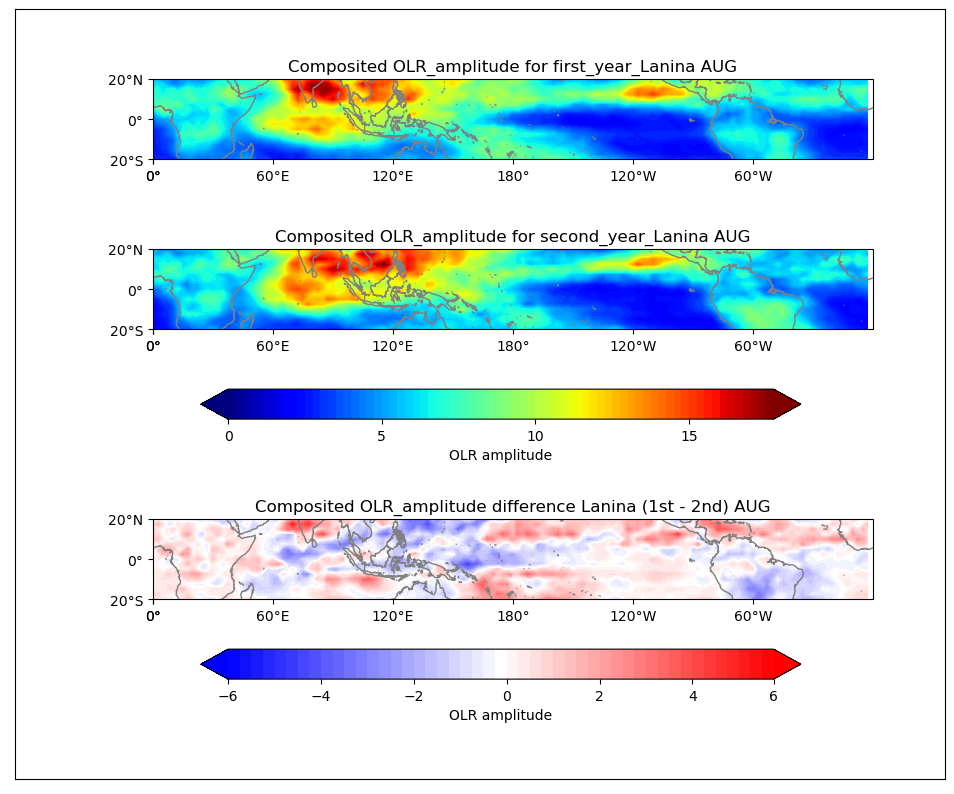

In [7]:
c = sqrtvar.resample(time ="M").mean(dim="time")

dsnov = c.groupby("time.month")[8]
dsnov['time']=dsnov['time.year']
dsnov=dsnov.rename({'time': 'Year'})
dsnov.name = 'olr'

oni = pd.read_csv('Year_NDJ.txt',delim_whitespace=True,index_col=0)
new_ds = xr.merge([dsnov,oni.to_xarray()],join='inner')
Lasgl = new_ds.olr[sgl,:,:].mean(axis=0)
Ladbl = new_ds.olr[dbl,:,:].mean(axis=0)
Delta = Ladbl - Lasgl
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature 
import cartopy.mpl.ticker as cticker 


leftlon, rightlon, lowerlat, upperlat = (0,420,-20,20)
img_extent = [leftlon, rightlon, lowerlat, upperlat]
lon_formatter = cticker.LongitudeFormatter()
lat_formatter = cticker.LatitudeFormatter()
#figur 1
fig,ax1 = plt.subplots(figsize=(12,10)) 
plt.xticks([])
plt.yticks([])
ax1 = fig.add_axes([0.24, 0.47, 0.6, 0.6],projection = ccrs.PlateCarree(central_longitude=180),zorder=1)
ax1.set_extent(img_extent, crs=ccrs.PlateCarree())
ax1.add_feature(cfeature.COASTLINE,color='grey') 
ax1.set_xticks(range(0,360+60,60), crs=ccrs.PlateCarree())
ax1.set_yticks(range(-20,21,20), crs=ccrs.PlateCarree())
ax1.xaxis.set_major_formatter(lon_formatter)
ax1.yaxis.set_major_formatter(lat_formatter)
ax1.title.set_text('Composited OLR_amplitude for first_year_Lanina AUG')
c1 = ax1.contourf(lon,lat,Lasgl,
                levels=np.arange(0,18,0.25),
                extend='both' ,
                cmap = 'jet',
                transform=ccrs.PlateCarree(),zorder = 0)
fig.colorbar(c1, cax=fig.add_axes([0.28, 0.47, 0.5, 0.03 ]),
             orientation='horizontal',  
             label= 'OLR amplitude', 
             ticks=np.arange(0,18.1,5),
             shrink=0.7)

# figure 2
ax = fig.add_axes([0.24, 0.3, 0.6, 0.6],projection = ccrs.PlateCarree(central_longitude=180),zorder=1)
ax.set_extent(img_extent, crs=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE,color='grey') 
ax.set_xticks(range(0,360+60,60), crs=ccrs.PlateCarree())
ax.set_yticks(range(-20,21,20), crs=ccrs.PlateCarree())
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.title.set_text('Composited OLR_amplitude for second_year_Lanina AUG')

c = ax.contourf(lon,lat,Ladbl,
                levels=np.arange(0,18,0.25),
                extend='both' ,
                cmap = 'jet',
                transform=ccrs.PlateCarree(),zorder = 0)


#figure 3
a = Lasgl-Ladbl 
    
ax0 = fig.add_axes([0.24, 0.03, 0.6, 0.6],projection = ccrs.PlateCarree(central_longitude=180),zorder=1)
ax0.set_extent(img_extent, crs=ccrs.PlateCarree())
ax0.add_feature(cfeature.COASTLINE,color='grey') 
ax0.set_xticks(range(0,360+60,60), crs=ccrs.PlateCarree())
ax0.set_yticks(range(-20,21,20), crs=ccrs.PlateCarree())
ax0.xaxis.set_major_formatter(lon_formatter)
ax0.yaxis.set_major_formatter(lat_formatter)
ax0.title.set_text('Composited OLR_amplitude difference Lanina (1st - 2nd) AUG')

c0 = ax0.contourf(lon,lat,a,
                levels=np.arange(-6,6,0.25),
                extend='both' ,
                cmap = plt.get_cmap('bwr'),
                transform=ccrs.PlateCarree(),zorder = 0)


fig.colorbar(c0, cax=fig.add_axes([0.28, 0.21, 0.5, 0.03 ]),
             orientation='horizontal',  
             label= 'OLR amplitude', 
             ticks=np.arange(-6,6.1,2),
             shrink=0.7)

C:\Users\lv299\anaconda3\lib\site-packages\cartopy\crs.py:245: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
C:\Users\lv299\anaconda3\lib\site-packages\cartopy\crs.py:297: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
C:\Users\lv299\anaconda3\lib\site-packages\cartopy\crs.py:364: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:


C:\Users\lv299\anaconda3\lib\site-packages\cartopy\crs.py:256: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  line_strings = list(multi_line_string)
C:\Users\lv299\anaconda3\lib\site-packages\cartopy\crs.py:256: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  line_strings = list(multi_line_string)
C:\Users\lv299\anaconda3\lib\site-packages\cartopy\crs.py:402: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  line_strings.extend(multi_line_string)
C:\Users\lv299\anaconda3\lib\site-packages\cartopy\crs.py:402: ShapelyDeprecatio

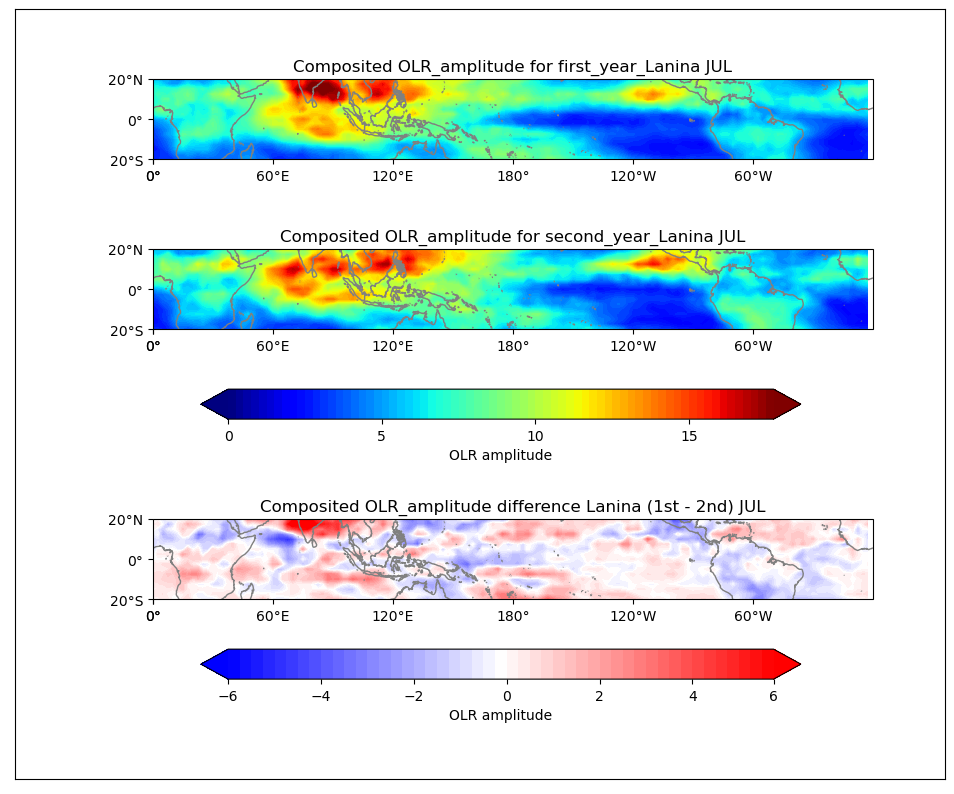

In [8]:
c = sqrtvar.resample(time ="M").mean(dim="time")

dsnov = c.groupby("time.month")[7]
dsnov['time']=dsnov['time.year']
dsnov=dsnov.rename({'time': 'Year'})
dsnov.name = 'olr'

oni = pd.read_csv('Year_NDJ.txt',delim_whitespace=True,index_col=0)
new_ds = xr.merge([dsnov,oni.to_xarray()],join='inner')
Lasgl = new_ds.olr[sgl,:,:].mean(axis=0)
Ladbl = new_ds.olr[dbl,:,:].mean(axis=0)
Delta = Ladbl - Lasgl
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature 
import cartopy.mpl.ticker as cticker 


leftlon, rightlon, lowerlat, upperlat = (0,420,-20,20)
img_extent = [leftlon, rightlon, lowerlat, upperlat]
lon_formatter = cticker.LongitudeFormatter()
lat_formatter = cticker.LatitudeFormatter()
#figur 1
fig,ax1 = plt.subplots(figsize=(12,10)) 
plt.xticks([])
plt.yticks([])
ax1 = fig.add_axes([0.24, 0.47, 0.6, 0.6],projection = ccrs.PlateCarree(central_longitude=180),zorder=1)
ax1.set_extent(img_extent, crs=ccrs.PlateCarree())
ax1.add_feature(cfeature.COASTLINE,color='grey') 
ax1.set_xticks(range(0,360+60,60), crs=ccrs.PlateCarree())
ax1.set_yticks(range(-20,21,20), crs=ccrs.PlateCarree())
ax1.xaxis.set_major_formatter(lon_formatter)
ax1.yaxis.set_major_formatter(lat_formatter)
ax1.title.set_text('Composited OLR_amplitude for first_year_Lanina JUL')
c1 = ax1.contourf(lon,lat,Lasgl,
                levels=np.arange(0,18,0.25),
                extend='both' ,
                cmap = 'jet',
                transform=ccrs.PlateCarree(),zorder = 0)
fig.colorbar(c1, cax=fig.add_axes([0.28, 0.47, 0.5, 0.03 ]),
             orientation='horizontal',  
             label= 'OLR amplitude', 
             ticks=np.arange(0,18.1,5),
             shrink=0.7)

# figure 2
ax = fig.add_axes([0.24, 0.3, 0.6, 0.6],projection = ccrs.PlateCarree(central_longitude=180),zorder=1)
ax.set_extent(img_extent, crs=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE,color='grey') 
ax.set_xticks(range(0,360+60,60), crs=ccrs.PlateCarree())
ax.set_yticks(range(-20,21,20), crs=ccrs.PlateCarree())
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.title.set_text('Composited OLR_amplitude for second_year_Lanina JUL')

c = ax.contourf(lon,lat,Ladbl,
                levels=np.arange(0,18,0.25),
                extend='both' ,
                cmap = 'jet',
                transform=ccrs.PlateCarree(),zorder = 0)


#figure 3
a = Lasgl-Ladbl 
    
ax0 = fig.add_axes([0.24, 0.03, 0.6, 0.6],projection = ccrs.PlateCarree(central_longitude=180),zorder=1)
ax0.set_extent(img_extent, crs=ccrs.PlateCarree())
ax0.add_feature(cfeature.COASTLINE,color='grey') 
ax0.set_xticks(range(0,360+60,60), crs=ccrs.PlateCarree())
ax0.set_yticks(range(-20,21,20), crs=ccrs.PlateCarree())
ax0.xaxis.set_major_formatter(lon_formatter)
ax0.yaxis.set_major_formatter(lat_formatter)
ax0.title.set_text('Composited OLR_amplitude difference Lanina (1st - 2nd) JUL')

c0 = ax0.contourf(lon,lat,a,
                levels=np.arange(-6,6,0.25),
                extend='both' ,
                cmap = plt.get_cmap('bwr'),
                transform=ccrs.PlateCarree(),zorder = 0)


fig.colorbar(c0, cax=fig.add_axes([0.28, 0.21, 0.5, 0.03 ]),
             orientation='horizontal',  
             label= 'OLR amplitude', 
             ticks=np.arange(-6,6.1,2),
             shrink=0.7)